## ベイズ因子比較

In [1]:
import numpy as np
import scipy.stats as stats
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from IPython.core.pylabtools import figsize
import math

plt.style.use('ggplot')

50 	 50


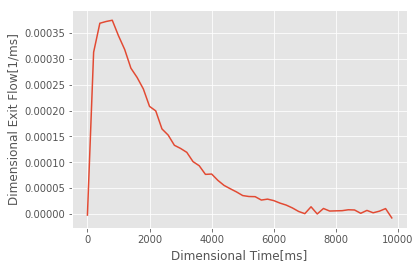

In [4]:
data_file = 'TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat'
data_points = 50
epsilon = 1.0
length = 35.0

def p_n(n):
    return (n+0.5)*np.pi

def r_plus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)+np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def r_minus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)-np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def A_n(p_n, r_plus, r_minus, k_a):
    return (r_plus + (p_n**2) + k_a)/(r_plus - r_minus)

def Flow(diffusivity, k_a, k_d, epsilon, length, time):
    dimensionless_time = time * diffusivity/(epsilon*length**2)
    r_flow = np.zeros(len(time))
    for n in range(100):
        pn = p_n(n); r_p = r_plus(p_n=pn, k_a=k_a, k_d=k_d); r_m = r_minus(p_n=pn, k_a=k_a, k_d=k_d)
        A = A_n(p_n=pn, r_plus=r_p, r_minus=r_m, k_a=k_a)
        r_flow += np.power(-1.0,n)*(2.0*n+1.0)*( A*np.exp(r_m*dimensionless_time)+(1.0-A)*np.exp(r_p*dimensionless_time) )
    r_flow *= np.pi
    r_flow *= diffusivity/(epsilon*np.power(length, 2))

    return r_flow

dimensional_time = np.zeros(data_points)
dimensional_exit_flow = np.zeros(data_points)
i = 0
j = 0
for line in open(data_file, "r"):
    if i%(10000/data_points)==0:
        data = line.split("\t")
        dimensional_time[j] = data[0]
        dimensional_exit_flow[j] = data[1]
        j += 1
    else:
        pass
    i += 1

print(len(dimensional_time), "\t", len(dimensional_exit_flow))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dimensional_time, dimensional_exit_flow)

ax.set_xlabel('Dimensional Time[ms]')
ax.set_ylabel('Dimensional Exit Flow[1/ms]')

plt.show()

In [3]:
def file_output_one(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 3<=l<=model.shape[0]+2:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+5)<=l<=(2*model.shape[0]+4):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+7):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

## Path1

## 交換なし

In [4]:
read_file_pass = '\\Users\\anbaigashi\\Desktop\\ABC\\2019\\March\\'

time = 102400
time_n = 204800
model = 0.1*np.arange(0, 11, dtype=float)
print(model)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [5]:
de0_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
update_one_T1_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T1_n = ['zero', 'one', 'two', 'three', 'four']

de0_one_T2_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_T2_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_T2_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_T2_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T2_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_T2_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T2_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_T2_n = ['zero', 'one', 'two', 'three', 'four']
update_one_T2_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T2_n = ['zero', 'one', 'two', 'three', 'four']

de0_one_T3_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_T3_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_T3_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_T3_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T3_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_T3_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T3_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_T3_n = ['zero', 'one', 'two', 'three', 'four']
update_one_T3_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T3_n = ['zero', 'one', 'two', 'three', 'four']

de0_one_T4_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_T4_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_T4_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_T4_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T4_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_T4_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T4_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_T4_n = ['zero', 'one', 'two', 'three', 'four']
update_one_T4_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T4_n = ['zero', 'one', 'two', 'three', 'four']

de0_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
update_one_T5_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T5_n = ['zero', 'one', 'two', 'three', 'four']

de0_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
update_one_T10_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T10_n = ['zero', 'one', 'two', 'three', 'four']

de0_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
de1_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
ka_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
kd_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
energy_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
pick_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
update_one_T20_n = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T20_n = ['zero', 'one', 'two', 'three', 'four']

In [6]:
%%time

for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=1.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T1_n[i], de1_one_T1_n[i], ka_one_T1_n[i], kd_one_T1_n[i], sigma_one_T1_n[i], energy_one_T1_n[i], dlogp_one_T1_n[i],\
    pick_one_T1_n[i], update_one_T1_n[i], exchange_one_T1_n[i] = file_output_one(r_file, time_n, model)

#     r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=5.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
#     de0_one_T5_n[i], de1_one_T5_n[i], ka_one_T5_n[i], kd_one_T5_n[i], sigma_one_T5_n[i], energy_one_T5_n[i], dlogp_one_T5_n[i],\
#     pick_one_T5_n[i], update_one_T5_n[i], exchange_one_T5_n[i] = file_output_one(r_file, time_n, model)
       
#     r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=10.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
#     de0_one_T10_n[i], de1_one_T10_n[i], ka_one_T10_n[i], kd_one_T10_n[i], sigma_one_T10_n[i], energy_one_T10_n[i], dlogp_one_T10_n[i],\
#     pick_one_T10_n[i], update_one_T10_n[i], exchange_one_T10_n[i] = file_output_one(r_file, time_n, model)
    
#     r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=20.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
#     de0_one_T20_n[i], de1_one_T20_n[i], ka_one_T20_n[i], kd_one_T20_n[i], sigma_one_T20_n[i], energy_one_T20_n[i], dlogp_one_T20_n[i],\
#     pick_one_T20_n[i], update_one_T20_n[i], exchange_one_T20_n[i] = file_output_one(r_file, time_n, model)

Wall time: 1min 53s


In [9]:
%%time

for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=2.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T2_n[i], de1_one_T2_n[i], ka_one_T2_n[i], kd_one_T2_n[i], sigma_one_T2_n[i], energy_one_T2_n[i], dlogp_one_T2_n[i],\
    pick_one_T2_n[i], update_one_T2_n[i], exchange_one_T2_n[i] = file_output_one(r_file, time_n, model)

    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=3.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T3_n[i], de1_one_T3_n[i], ka_one_T3_n[i], kd_one_T3_n[i], sigma_one_T3_n[i], energy_one_T3_n[i], dlogp_one_T3_n[i],\
    pick_one_T3_n[i], update_one_T3_n[i], exchange_one_T3_n[i] = file_output_one(r_file, time_n, model)
       
    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=4.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T4_n[i], de1_one_T4_n[i], ka_one_T4_n[i], kd_one_T4_n[i], sigma_one_T4_n[i], energy_one_T4_n[i], dlogp_one_T4_n[i],\
    pick_one_T4_n[i], update_one_T4_n[i], exchange_one_T4_n[i] = file_output_one(r_file, time_n, model)

Wall time: 6min 15s


In [11]:
print(dlogp_one_T1_n[4])

[[  4.24463204e+03   1.95121012e+02   1.95121012e+02 ...,   1.26439021e+01
    8.50531180e+01   2.09996387e+02]
 [  4.18439416e+03   4.18439416e+03   5.01268300e+03 ...,  -1.25599770e+01
   -1.23445168e+01  -1.21289683e+01]
 [  4.12415627e+03   4.98652055e+03   4.98652055e+03 ...,  -5.62351421e+00
   -7.30964378e+00  -7.30964378e+00]
 ..., 
 [  3.76272896e+03   3.77645698e+03   6.24058153e+03 ...,   7.92522456e+00
   -1.29864555e+00  -1.29864555e+00]
 [  3.70249108e+03   3.70249108e+03   6.32125196e+03 ...,   4.98777113e+01
    5.38024919e+01   4.96086132e+01]
 [  3.64225319e+03   3.64225319e+03   5.38459598e+03 ...,  -1.00821033e+02
   -8.23906060e+01  -3.53653209e+01]]


In [12]:
print("Temp=1", update_one_T1_n[0].sum(axis=1)/time_n)
print("Temp=2", update_one_T2_n[0].sum(axis=1)/time_n)
print("Temp=3", update_one_T3_n[0].sum(axis=1)/time_n)
print("Temp=4", update_one_T4_n[0].sum(axis=1)/time_n)
print("Temp=5", update_one_T5_n[0].sum(axis=1)/time_n)
print("Temp=10", update_one_T10_n[0].sum(axis=1)/time_n)
print("Temp=20", update_one_T20_n[0].sum(axis=1)/time_n)

Temp=1 [ 0.79130371  0.75252441  0.67054199  0.58574219  0.58429688  0.50740723
  0.44375488  0.44222656  0.48253418  0.60834961  0.5311084 ]
Temp=2 [ 0.8340918   0.78463379  0.82342773  0.80297852  0.84474609  0.78449707
  0.76462891  0.78545898  0.83206055  0.72396484  0.67499023]
Temp=3 [ 0.92839844  0.88777832  0.89224609  0.95677246  0.97585937  0.94694824
  0.95246582  0.94169434  0.91369141  0.80768555  0.76926758]
Temp=4 [ 0.98510742  0.9884375   0.9912207   0.9817041   0.9803125   0.98530273
  0.97834961  0.97510742  0.97781738  0.94701172  0.87010254]
Temp=5 [ 0.9907959   0.99083496  0.98294922  0.99081055  0.98935547  0.9842627
  0.99062988  0.98751465  0.98953613  0.99025879  0.99602539]
Temp=10 [ 0.99119629  0.99278809  0.99716797  0.99462402  0.99328613  0.9955127
  0.99605957  0.9938623   0.9900293   0.99420898  0.99179688]
Temp=20 [ 0.99719727  0.99562988  0.99603027  0.99605957  0.99720215  0.99518066
  0.99713867  0.99458008  0.99640625  0.99603027  0.99626953]


In [108]:
def fig_energy(start, energy, filename):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    
    read_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\'

    end = 2*start

    energy_m = np.zeros(11, dtype=float)
    energy_s = np.zeros(11, dtype=float)

    for i in range(11):
        bar_A_i = np.zeros(5, dtype=float)
        for j in range(5):
            bar_A_i[j] = energy[j][i][start:end].mean()
        energy_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(5):
            sig += (bar_A_i[j]-energy_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        energy_s[i] = sig


    ax.errorbar(0.1*np.arange(11, dtype=float), energy_m, yerr=energy_s, fmt='o', color='red')
    ax.set_xlabel('$M$')
    ax.set_ylabel('$<Eenrgy>$')

    fn = read_file_pass + filename
    plt.savefig(fn)

    plt.show()
    
    return energy_m, energy_s

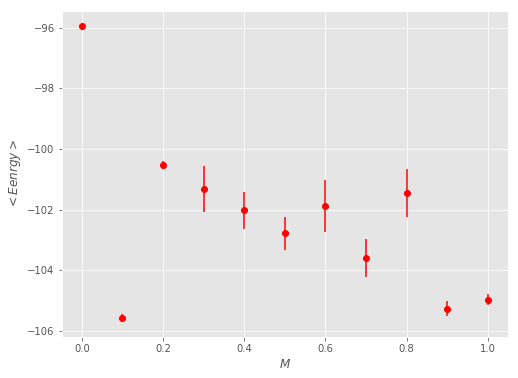

In [113]:
energy_m_T1_n, energy_s_T1_n = fig_energy(51200, energy_one_T1_n, 'Energy-M_figure_Temp=1_koukannashi_deltaT=51200-102400.png')

In [124]:
def fig_dE(start, dlogp, filename):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    
    read_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\'

    end = 2*start

    dlogp_m = np.zeros(11, dtype=float)
    dlogp_s = np.zeros(11, dtype=float)

    for i in range(11):
        bar_A_i = np.zeros(5, dtype=float)
        for j in range(5):
            bar_A_i[j] = dlogp[j][i][start:end].mean()
        dlogp_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(5):
            sig += (bar_A_i[j]-dlogp_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        dlogp_s[i] = sig


    ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color='red')
    ax.set_xlabel('$M$')
    ax.set_ylabel('$<-dE/dM>$')

    fn = read_file_pass + filename
    plt.savefig(fn)

    plt.show()
    
    return dlogp_m, dlogp_s

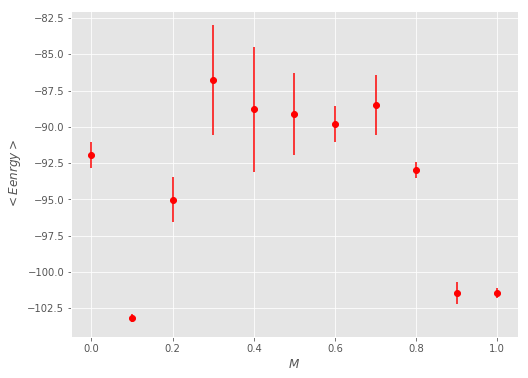

In [114]:
energy_m_T2_n, energy_s_T2_n = fig_energy(51200, energy_one_T2_n, 'Energy-M_figure_Temp=2_koukannashi_deltaT=51200-102400.png')

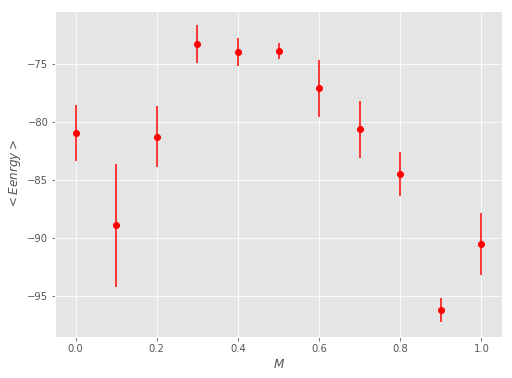

In [116]:
energy_m_T3_n, energy_s_T3_n = fig_energy(51200, energy_one_T3_n, 'Energy-M_figure_Temp=3_koukannashi_deltaT=51200-102400.png')

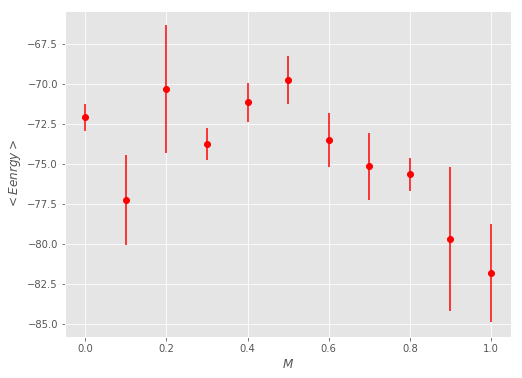

In [117]:
energy_m_T4_n, energy_s_T4_n = fig_energy(51200, energy_one_T4_n, 'Energy-M_figure_Temp=4_koukannashi_deltaT=51200-102400.png')

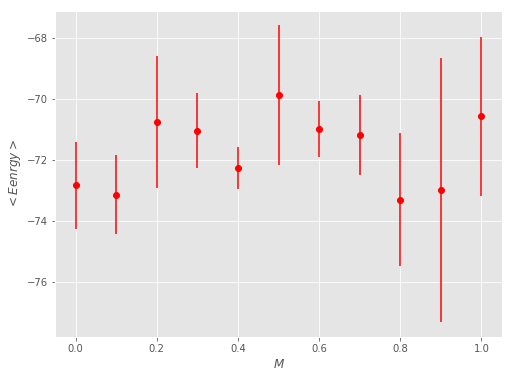

In [118]:
energy_m_T5_n, energy_s_T5_n = fig_energy(51200, energy_one_T5_n, 'Energy-M_figure_Temp=5_koukannashi_deltaT=51200-102400.png')

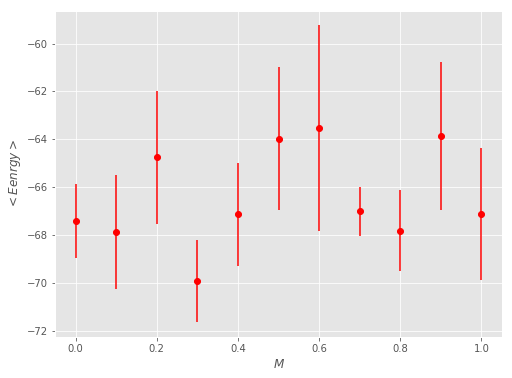

In [119]:
energy_m_T10_n, energy_s_T10_n = fig_energy(51200, energy_one_T10_n, 'Energy-M_figure_Temp=10_koukannashi_deltaT=51200-102400.png')

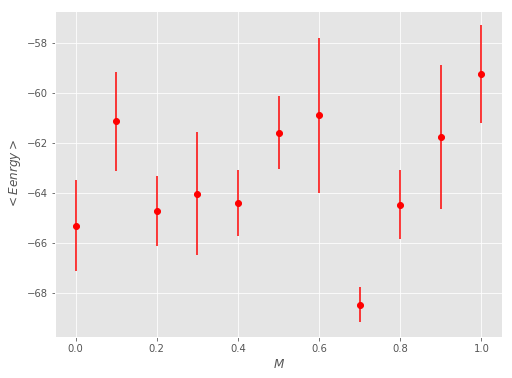

In [120]:
energy_m_T20_n, energy_s_T20_n = fig_energy(51200, energy_one_T20_n, 'Energy-M_figure_Temp=20_koukannashi_deltaT=51200-102400.png')

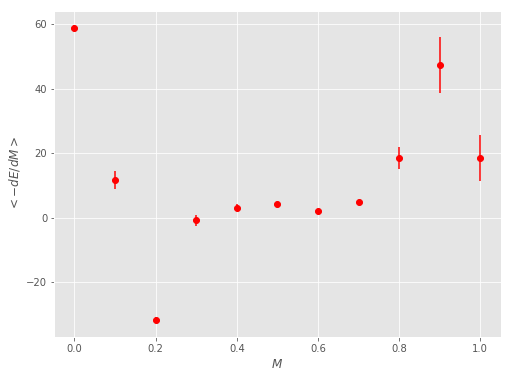

In [125]:
dlogp_m_T1_n, dlogp_s_T1_n = fig_dE(51200, dlogp_one_T1_n, 'dEnergy-M_figure_Temp=1_koukannashi_deltaT=51200-102400.png')

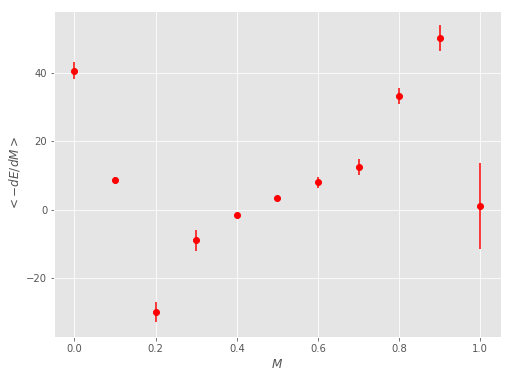

In [128]:
dlogp_m_T2_n, dlogp_s_T2_n = fig_dE(51200, dlogp_one_T2_n, 'dEnergy-M_figure_Temp=2_koukannashi_deltaT=51200-102400.png')

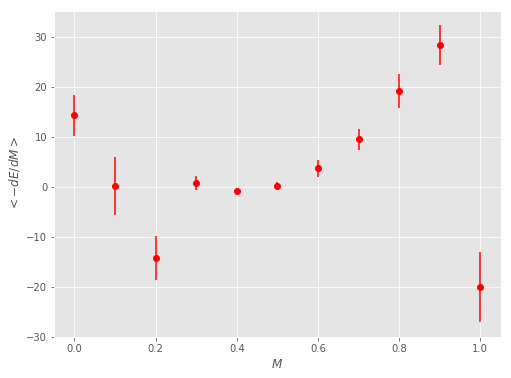

In [129]:
dlogp_m_T3_n, dlogp_s_T3_n = fig_dE(51200, dlogp_one_T3_n, 'dEnergy-M_figure_Temp=3_koukannashi_deltaT=51200-102400.png')

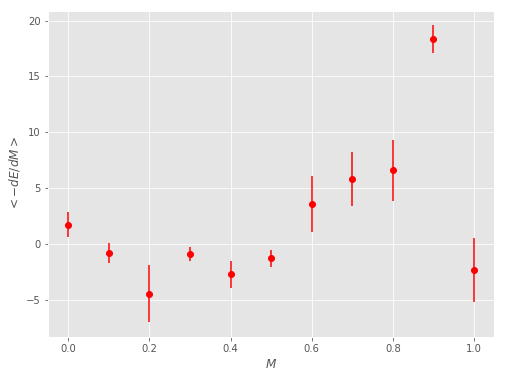

In [130]:
dlogp_m_T4_n, dlogp_s_T4_n = fig_dE(51200, dlogp_one_T4_n, 'dEnergy-M_figure_Temp=4_koukannashi_deltaT=51200-102400.png')

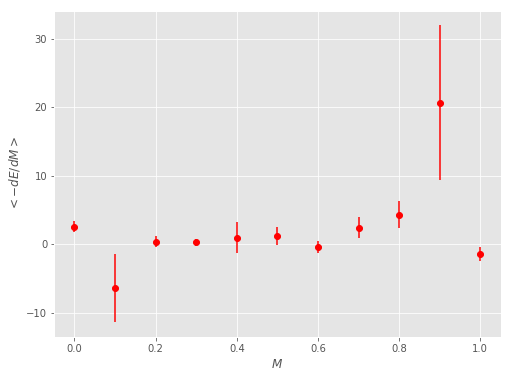

In [131]:
dlogp_m_T5_n, dlogp_s_T5_n = fig_dE(51200, dlogp_one_T5_n, 'dEnergy-M_figure_Temp=5_koukannashi_deltaT=51200-102400.png')

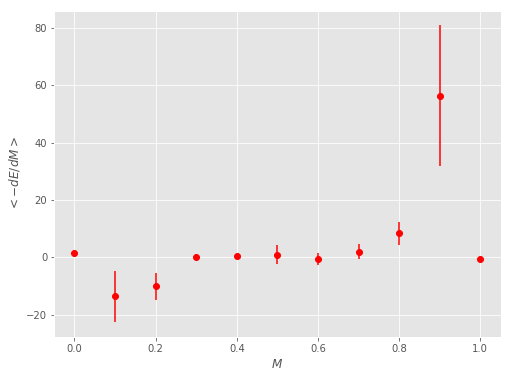

In [132]:
dlogp_m_T10_n, dlogp_s_T10_n = fig_dE(51200, dlogp_one_T10_n, 'dEnergy-M_figure_Temp=10_koukannashi_deltaT=51200-102400.png')

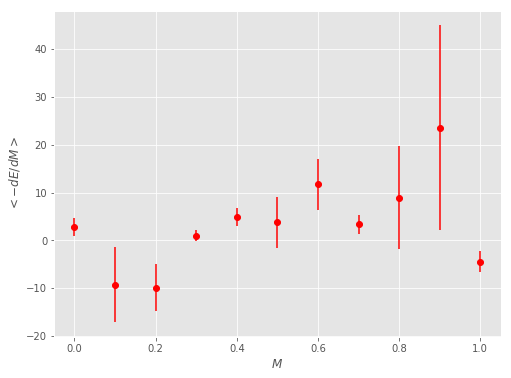

In [133]:
dlogp_m_T20_n, dlogp_s_T20_n = fig_dE(51200, dlogp_one_T20_n, 'dEnergy-M_figure_Temp=20_koukannashi_deltaT=51200-102400.png')

In [29]:
print(dlogp_m_T20_n[5])

-0.501682628124


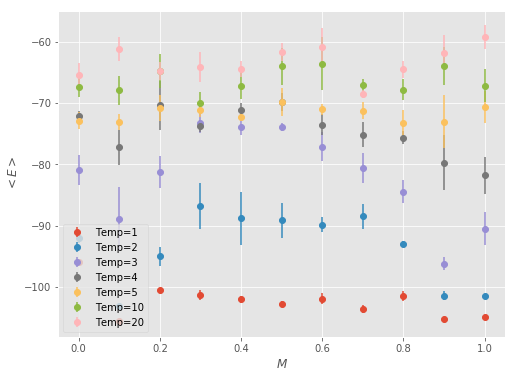

In [134]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 2, 3, 4, 5, 10, 20])

read_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\'

ax.errorbar(model, energy_m_T1_n, yerr=energy_s_T1_n, color=cycle[0], fmt='o', label='Temp={}'.format(temp[0]))
ax.errorbar(model, energy_m_T2_n, yerr=energy_s_T2_n, color=cycle[1], fmt='o', label='Temp={}'.format(temp[1]))
ax.errorbar(model, energy_m_T3_n, yerr=energy_s_T3_n, color=cycle[2], fmt='o', label='Temp={}'.format(temp[2]))
ax.errorbar(model, energy_m_T4_n, yerr=energy_s_T4_n, color=cycle[3], fmt='o', label='Temp={}'.format(temp[3]))
ax.errorbar(model, energy_m_T5_n, yerr=energy_s_T5_n, color=cycle[4], fmt='o', label='Temp={}'.format(temp[4]))
ax.errorbar(model, energy_m_T10_n, yerr=energy_s_T10_n, color=cycle[5], fmt='o', label='Temp={}'.format(temp[5]))
ax.errorbar(model, energy_m_T20_n, yerr=energy_s_T20_n, color=cycle[6], fmt='o', label='Temp={}'.format(temp[6]))

ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
plt.legend()

fn = read_file_pass + 'Energy-M_EveryTemperature_koukannashi_deltaT=51200-102400.png'

plt.savefig(fn)
plt.show()

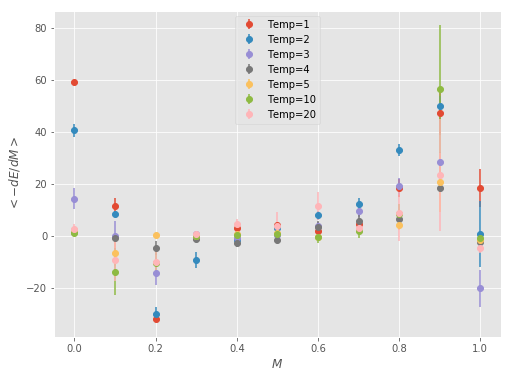

In [135]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 2, 3, 4, 5, 10, 20])

ax.errorbar(model, dlogp_m_T1_n, yerr=dlogp_s_T1_n, color=cycle[0], fmt='o', label='Temp={}'.format(temp[0]))
ax.errorbar(model, dlogp_m_T2_n, yerr=dlogp_s_T2_n, color=cycle[1], fmt='o', label='Temp={}'.format(temp[1]))
ax.errorbar(model, dlogp_m_T3_n, yerr=dlogp_s_T3_n, color=cycle[2], fmt='o', label='Temp={}'.format(temp[2]))
ax.errorbar(model, dlogp_m_T4_n, yerr=dlogp_s_T4_n, color=cycle[3], fmt='o', label='Temp={}'.format(temp[3]))
ax.errorbar(model, dlogp_m_T5_n, yerr=dlogp_s_T5_n, color=cycle[4], fmt='o', label='Temp={}'.format(temp[4]))
ax.errorbar(model, dlogp_m_T10_n, yerr=dlogp_s_T10_n, color=cycle[5], fmt='o', label='Temp={}'.format(temp[5]))
ax.errorbar(model, dlogp_m_T20_n, yerr=dlogp_s_T20_n, color=cycle[6], fmt='o', label='Temp={}'.format(temp[6]))

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()
fn = read_file_pass + 'dEnergy-M_EveryTemperature_koukannashi_deltaT=51200-102400.png'

plt.savefig(fn)
plt.show()

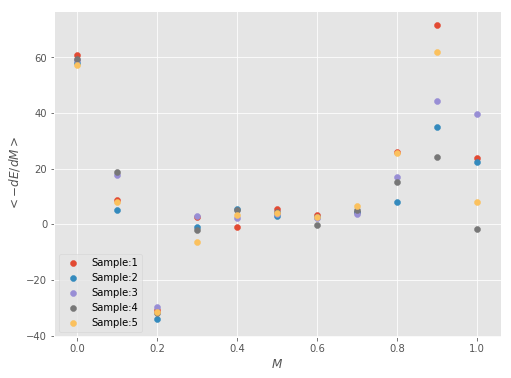

In [137]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
dE = np.zeros([5, 11])

start = 51200
end = 2*start

for i in range(5):
    for j in range(11):
        dE[i, j] = dlogp_one_T1_n[i][j, start:end].mean()
    
    ax.scatter(model, dE[i], color=cycle[i], label='Sample:{}'.format(i+1))

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

fn = read_file_pass + 'dEnergy-M_EverySample_koukannashi_deltaT=51200-102400.png'
plt.savefig(fn)

plt.show()

In [33]:
N = 10
y = np.zeros([N, 11])
S = np.zeros(N)
for i in range(N):
    x = np.random.randint(0, 5, 11)
    for j in range(11):
        y[i, j] = dE[x[j], j]
    S[i] = integrate.simps(y[i], model)

In [34]:
print(S)
print(S.shape[0])
bar_S = S.mean()
sig_S = 0.
for i in range(N):
    sig_S += (S[i]-bar_S)**2
sig_S /= (S.shape[0]-1)
sig_S = np.sqrt(sig_S)
sig_S /= np.sqrt(S.shape[0])
print(bar_S, sig_S)
print(bar_S-sig_S, bar_S+sig_S)

[ 12.78460852  13.75207595  10.33469063  11.59278667  11.2196357
   9.26233092   7.41742786  10.43088437   7.29080319  12.01520758]
10
10.6100451395 0.675338360606
9.93470677892 11.2853835001


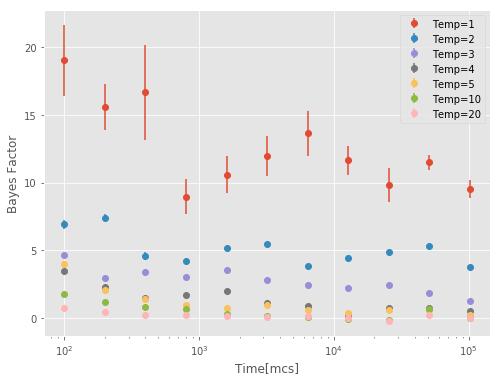

In [138]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<=102400:
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T1_n[i][j, start:end].mean()
            
    N = 10
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/1.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Temp=1')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
        
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T2_n[i][j, start:end].mean()
            
    N = 100
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/2
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='Temp=2')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])
        
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T3_n[i][j, start:end].mean()
            
    N = 100
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/3
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2], label='Temp=3')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2])
        
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T4_n[i][j, start:end].mean()
            
    N = 100
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/4
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3], label='Temp=4')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T5_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/5.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[4], label='Temp=5')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[4])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T10_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/10.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[5], label='Temp=10')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[5])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T20_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/20.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[6], label='Temp=20')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[6])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend()
fn = read_file_pass + 'BayesFactor-Time_EveryTemperature_koukannashi_deltaT=51200-102400.png'
plt.savefig(fn)
plt.show()

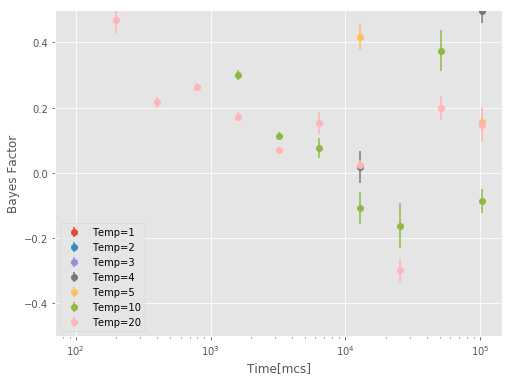

In [139]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<=102400:
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T1_n[i][j, start:end].mean()
            
    N = 10
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Temp=1')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
        
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T2_n[i][j, start:end].mean()
            
    N = 100
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/2
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='Temp=2')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])
        
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T3_n[i][j, start:end].mean()
            
    N = 100
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/3
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2], label='Temp=3')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2])
        
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T4_n[i][j, start:end].mean()
            
    N = 100
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/4
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3], label='Temp=4')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T5_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/5.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[4], label='Temp=5')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[4])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T10_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/10.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[5], label='Temp=10')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[5])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T20_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/20.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[6], label='Temp=20')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[6])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend()
ax.set_ylim(-0.5, .5)
fn = read_file_pass + 'BayesFactor-Time_EveryTemperature_koukannashi_deltaT=51200-102400zoomup.png'
plt.savefig(fn)
plt.show()

## 交換あり

In [7]:
de0_one_T1 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T1 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T1 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T1 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T1 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T1 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T1 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T1 = ['zero', 'one', 'two', 'three', 'four']
update_one_T1 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T1 = ['zero', 'one', 'two', 'three', 'four']

de0_one_T2 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T2 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T2 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T2 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T2 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T2 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T2 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T2 = ['zero', 'one', 'two', 'three', 'four']
update_one_T2 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T2 = ['zero', 'one', 'two', 'three', 'four']

de0_one_T3 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T3 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T3 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T3 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T3 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T3 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T3 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T3 = ['zero', 'one', 'two', 'three', 'four']
update_one_T3 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T3 = ['zero', 'one', 'two', 'three', 'four']

de0_one_T4 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T4 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T4 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T4 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T4 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T4 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T4 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T4 = ['zero', 'one', 'two', 'three', 'four']
update_one_T4 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T4 = ['zero', 'one', 'two', 'three', 'four']

de0_one_T5 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T5 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T5 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T5 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T5 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T5 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T5 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T5 = ['zero', 'one', 'two', 'three', 'four']
update_one_T5 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T5 = ['zero', 'one', 'two', 'three', 'four']

de0_one_T10 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T10 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T10 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T10 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T10 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T10 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T10 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T10 = ['zero', 'one', 'two', 'three', 'four']
update_one_T10 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T10 = ['zero', 'one', 'two', 'three', 'four']

de0_one_T20 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T20 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T20 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T20 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T20 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T20 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T20 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T20 = ['zero', 'one', 'two', 'three', 'four']
update_one_T20 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T20 = ['zero', 'one', 'two', 'three', 'four']

In [8]:
%%time 

for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=1.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T1[i], de1_one_T1[i], ka_one_T1[i], kd_one_T1[i], sigma_one_T1[i], energy_one_T1[i], dlogp_one_T1[i],\
    pick_one_T1[i], update_one_T1[i], exchange_one_T1[i] = file_output_one(r_file, time, model)

#     r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=5.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
#     de0_one_T5[i], de1_one_T5[i], ka_one_T5[i], kd_one_T5[i], sigma_one_T5[i], energy_one_T5[i], dlogp_one_T5[i],\
#     pick_one_T5[i], update_one_T5[i], exchange_one_T5[i] = file_output_one(r_file, time, model)
       
#     r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=10.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
#     de0_one_T10[i], de1_one_T10[i], ka_one_T10[i], kd_one_T10[i], sigma_one_T10[i], energy_one_T10[i], dlogp_one_T10[i],\
#     pick_one_T10[i], update_one_T10[i], exchange_one_T10[i] = file_output_one(r_file, time, model)
    
#     r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=20.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
#     de0_one_T20[i], de1_one_T20[i], ka_one_T20[i], kd_one_T20[i], sigma_one_T20[i], energy_one_T20[i], dlogp_one_T20[i],\
#     pick_one_T20[i], update_one_T20[i], exchange_one_T20[i] = file_output_one(r_file, time, model)

Wall time: 1min 3s


In [9]:
ar = np.zeros(11)
ex = np.zeros(10)
for i in range(5):
    ar += update_one_T1[i].sum(axis=1)/time
    ex += exchange_one_T1[i]/time

#print(ar)
print(ar/5)
print(ex/5)

[ 0.79155664  0.7491875   0.67726172  0.61903516  0.5669375   0.53094141
  0.50976367  0.5005      0.51190625  0.65323633  0.52850977]
[ 0.00455078  0.00471875  0.05604297  0.14045312  0.17787109  0.19160547
  0.18455273  0.13211914  0.00528125  0.00120703]


In [39]:
%%time

for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=2.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T2[i], de1_one_T2[i], ka_one_T2[i], kd_one_T2[i], sigma_one_T2[i], energy_one_T2[i], dlogp_one_T2[i],\
    pick_one_T2[i], update_one_T2[i], exchange_one_T2[i] = file_output_one(r_file, time, model)

    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=3.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T3[i], de1_one_T3[i], ka_one_T3[i], kd_one_T3[i], sigma_one_T3[i], energy_one_T3[i], dlogp_one_T3[i],\
    pick_one_T3[i], update_one_T3[i], exchange_one_T3[i] = file_output_one(r_file, time, model)
       
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=4.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T4[i], de1_one_T4[i], ka_one_T4[i], kd_one_T4[i], sigma_one_T4[i], energy_one_T4[i], dlogp_one_T4[i],\
    pick_one_T4[i], update_one_T4[i], exchange_one_T4[i] = file_output_one(r_file, time, model)

Wall time: 6min 44s


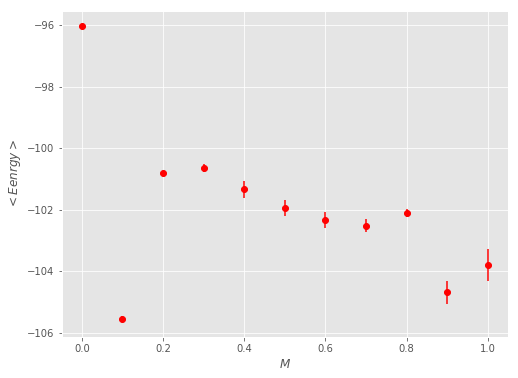

In [140]:
energy_m_T1, energy_s_T1 = fig_energy(51200, energy_one_T1, 'Energy-M_figure_Temp=1_deltaT=51200-102400.png')

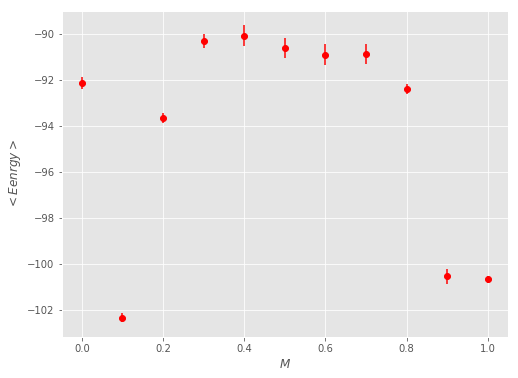

In [141]:
energy_m_T2, energy_s_T2 = fig_energy(51200, energy_one_T2, 'Energy-M_figure_Temp=2_deltaT=51200-102400.png')

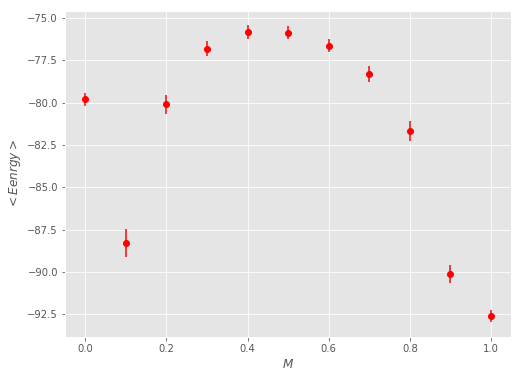

In [142]:
energy_m_T3, energy_s_T3 = fig_energy(51200, energy_one_T3, 'Energy-M_figure_Temp=3_deltaT=51200-102400.png')

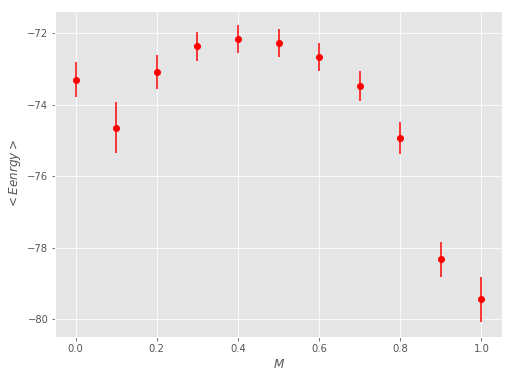

In [143]:
energy_m_T4, energy_s_T4 = fig_energy(51200, energy_one_T4, 'Energy-M_figure_Temp=4_deltaT=51200-102400.png')

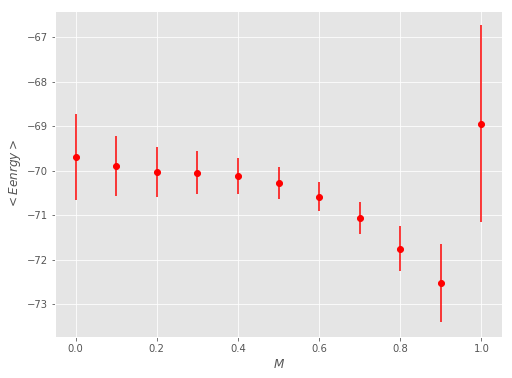

In [144]:
energy_m_T5, energy_s_T5 = fig_energy(51200, energy_one_T5, 'Energy-M_figure_Temp=5_deltaT=51200-102400.png')

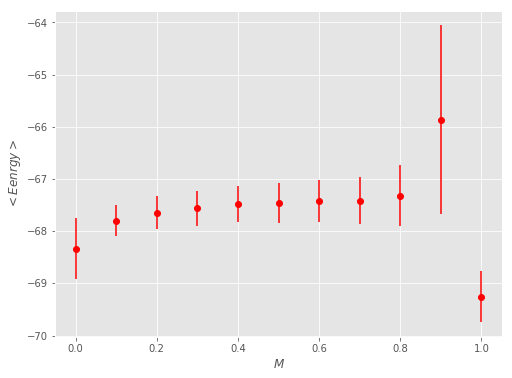

In [145]:
energy_m_T10, energy_s_T10 = fig_energy(51200, energy_one_T10, 'Energy-M_figure_Temp=10_deltaT=51200-102400.png')

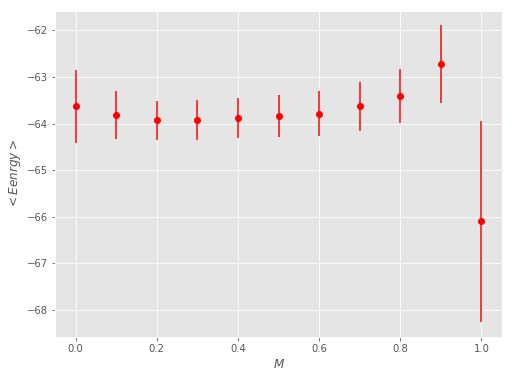

In [146]:
energy_m_T20, energy_s_T20 = fig_energy(51200, energy_one_T20, 'Energy-M_figure_Temp=20_deltaT=51200-102400.png')

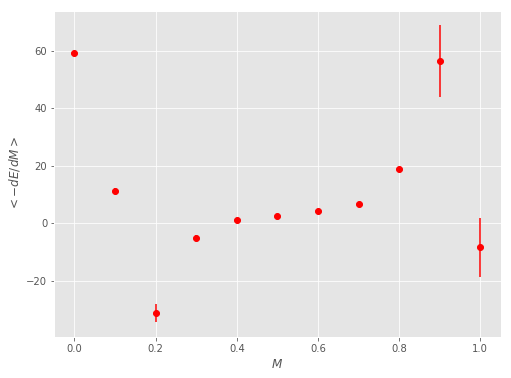

In [147]:
dlogp_m_T1, dlogp_s_T1 = fig_dE(51200, dlogp_one_T1, 'dEnergy-M_figure_Temp=1_deltaT=51200-102400.png')

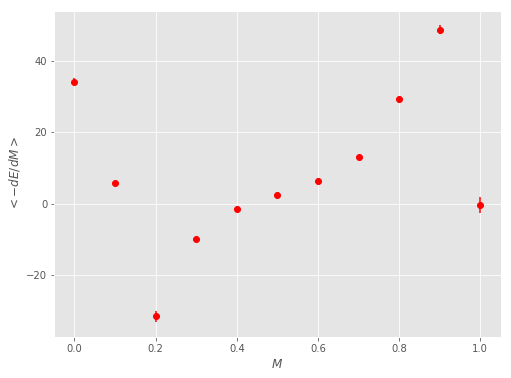

In [148]:
dlogp_m_T2, dlogp_s_T2 = fig_dE(51200, dlogp_one_T2, 'dEnergy-M_figure_Temp=2_deltaT=51200-102400.png')

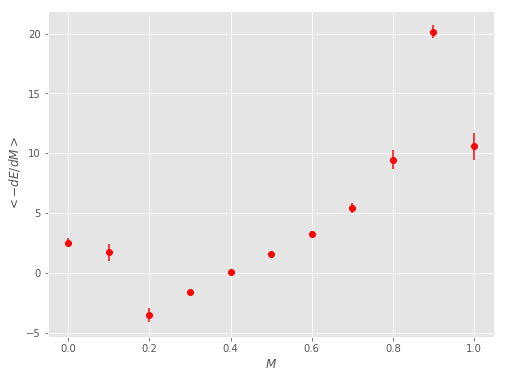

In [149]:
dlogp_m_T3, dlogp_s_T3 = fig_dE(51200, dlogp_one_T3, 'dEnergy-M_figure_Temp=3_deltaT=51200-102400.png')

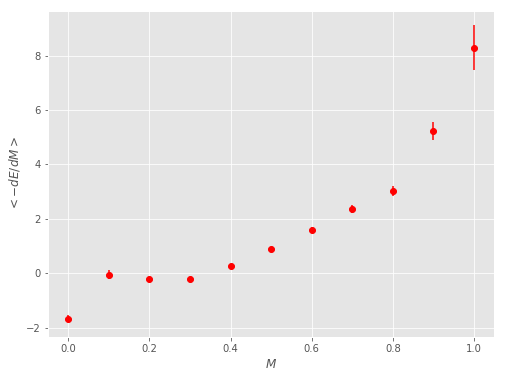

In [150]:
dlogp_m_T4, dlogp_s_T4 = fig_dE(51200, dlogp_one_T4, 'dEnergy-M_figure_Temp=4_deltaT=51200-102400.png')

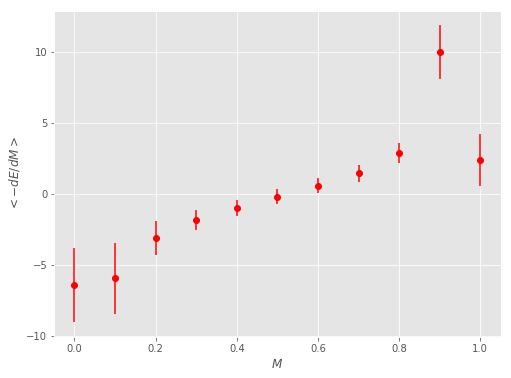

In [151]:
dlogp_m_T5, dlogp_s_T5 = fig_dE(51200, dlogp_one_T5, 'dEnergy-M_figure_Temp=5_deltaT=51200-102400.png')

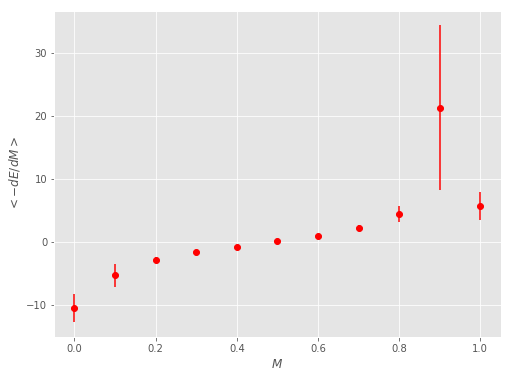

In [153]:
dlogp_m_T10, dlogp_s_T10 = fig_dE(51200, dlogp_one_T10,  'dEnergy-M_figure_Temp=10_deltaT=51200-102400.png')

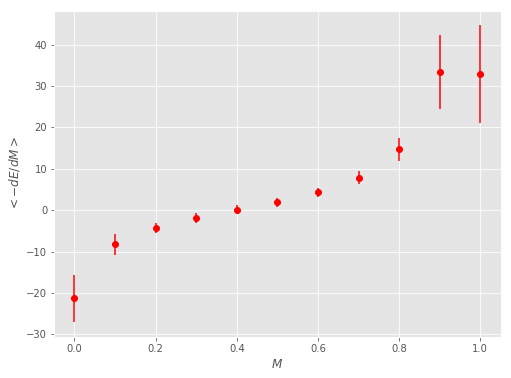

In [154]:
dlogp_m_T20, dlogp_s_T20 = fig_dE(51200, dlogp_one_T20, 'dEnergy-M_figure_Temp=20_deltaT=51200-102400.png')

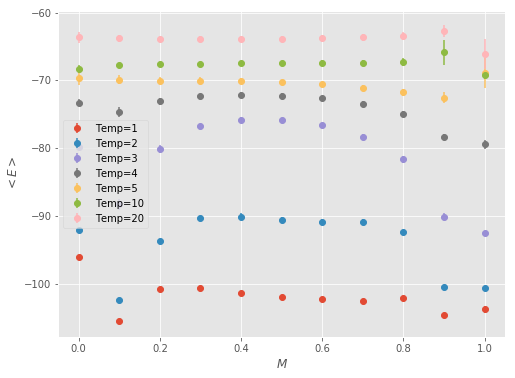

In [155]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 2, 3, 4, 5, 10, 20])

ax.errorbar(model, energy_m_T1, yerr=energy_s_T1, color=cycle[0], fmt='o', label='Temp={}'.format(temp[0]))
ax.errorbar(model, energy_m_T2, yerr=energy_s_T2, color=cycle[1], fmt='o', label='Temp={}'.format(temp[1]))
ax.errorbar(model, energy_m_T3, yerr=energy_s_T3, color=cycle[2], fmt='o', label='Temp={}'.format(temp[2]))
ax.errorbar(model, energy_m_T4, yerr=energy_s_T4, color=cycle[3], fmt='o', label='Temp={}'.format(temp[3]))
ax.errorbar(model, energy_m_T5, yerr=energy_s_T5, color=cycle[4], fmt='o', label='Temp={}'.format(temp[4]))
ax.errorbar(model, energy_m_T10, yerr=energy_s_T10, color=cycle[5], fmt='o', label='Temp={}'.format(temp[5]))
ax.errorbar(model, energy_m_T20, yerr=energy_s_T20, color=cycle[6], fmt='o', label='Temp={}'.format(temp[6]))

ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
plt.legend()

fn = read_file_pass + 'Energy-M_EveryTemperature_deltaT=51200-102400.png'
plt.savefig(fn)
plt.show()

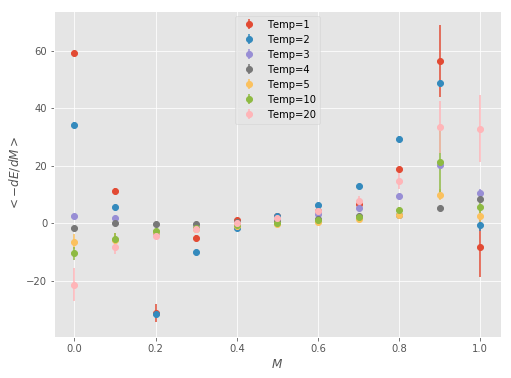

In [156]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 2, 3, 4, 5, 10, 20])

ax.errorbar(model, dlogp_m_T1, yerr=dlogp_s_T1, color=cycle[0], fmt='o', label='Temp={}'.format(temp[0]))
ax.errorbar(model, dlogp_m_T2, yerr=dlogp_s_T2, color=cycle[1], fmt='o', label='Temp={}'.format(temp[1]))
ax.errorbar(model, dlogp_m_T3, yerr=dlogp_s_T3, color=cycle[2], fmt='o', label='Temp={}'.format(temp[2]))
ax.errorbar(model, dlogp_m_T4, yerr=dlogp_s_T4, color=cycle[3], fmt='o', label='Temp={}'.format(temp[3]))
ax.errorbar(model, dlogp_m_T5, yerr=dlogp_s_T5, color=cycle[4], fmt='o', label='Temp={}'.format(temp[4]))
ax.errorbar(model, dlogp_m_T10, yerr=dlogp_s_T10, color=cycle[5], fmt='o', label='Temp={}'.format(temp[5]))
ax.errorbar(model, dlogp_m_T20, yerr=dlogp_s_T20, color=cycle[6], fmt='o', label='Temp={}'.format(temp[6]))

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

fn = read_file_pass + 'dEnergy-M_EveryTemperature_deltaT=51200-102400.png'
plt.savefig(fn)
plt.show()

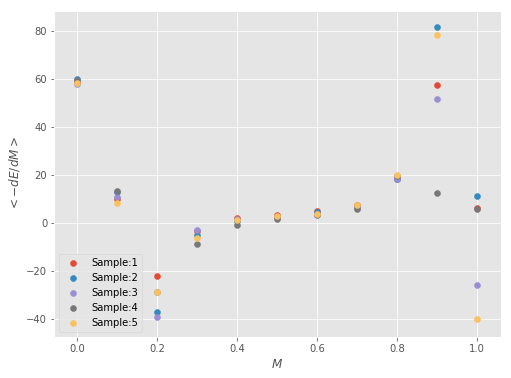

In [157]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
dE = np.zeros([5, 11])

start = 51200
end = 2*start

for i in range(5):
    for j in range(11):
        dE[i, j] = dlogp_one_T1[i][j, start:end].mean()
    
    ax.scatter(model, dE[i], color=cycle[i], label='Sample:{}'.format(i+1))

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

fn = read_file_pass + 'dEnergy-M_EverySample_deltaT=51200-102400.png'
plt.savefig(fn)
plt.show()

In [57]:
N = 10
y = np.zeros([N, 11])
S = np.zeros(N)
for i in range(N):
    x = np.random.randint(0, 5, 11)
    for j in range(11):
        y[i, j] = dE[x[j], j]
    S[i] = integrate.simps(y[i], model)

In [58]:
print(S)
print(S.shape[0])
bar_S = S.mean()
sig_S = 0.
for i in range(N):
    sig_S += (S[i]-bar_S)**2
sig_S /= (S.shape[0]-1)
sig_S = np.sqrt(sig_S)
sig_S /= np.sqrt(S.shape[0])
print(bar_S, sig_S)
print(bar_S-sig_S, bar_S+sig_S)

[ 14.03625383  12.03099416  15.14554418  13.05168021  13.51556403
  14.47514884  14.60543596   5.5914976   14.69128668  10.47539887]
10
12.761880436 0.914033065416
11.8478473706 13.6759135014


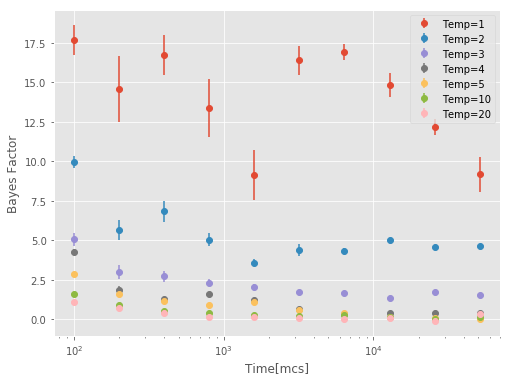

In [158]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T1[i][j, start:end].mean()
            
    N = 10
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Temp=1')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])

    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T2[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/2.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='Temp=2')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])

    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T3[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/3.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2], label='Temp=3')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2])

    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T4[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/4.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3], label='Temp=4')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3])
        
        
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T5[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/5.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[4], label='Temp=5')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[4])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T10[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/10.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[5], label='Temp=10')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[5])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T20[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/20.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[6], label='Temp=20')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[6])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend()
#ax.set_ylim(-0.5, .5)
fn = read_file_pass + 'BayesFactor-Time_EveryTemperature_deltaT=51200-102400.png'
plt.savefig(fn)
plt.show()

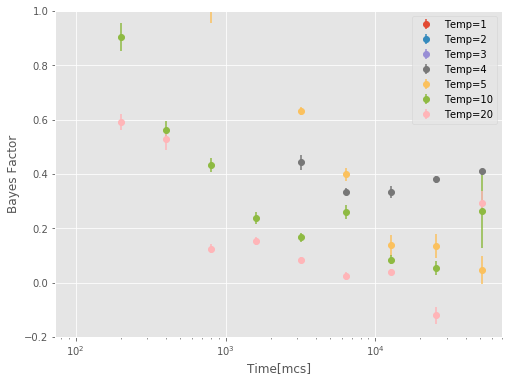

In [159]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T1[i][j, start:end].mean()
            
    N = 10
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/1.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Temp=1')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])

    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T2[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/2.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='Temp=2')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])

    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T3[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/3.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2], label='Temp=3')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[2])

    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T4[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/4.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3], label='Temp=4')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[3])
        
        
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T5[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/5.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[4], label='Temp=5')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[4])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T10[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/10.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[5], label='Temp=10')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[5])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T20[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/20.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[6], label='Temp=20')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[6])
    
    start = end
    end *= 2
    
ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
plt.legend()
ax.set_ylim(-0.2, 1)
fn = read_file_pass + 'BayesFactor-Time_EveryTemperature_deltaT=51200-102400zoomup.png'
plt.savefig(fn)
plt.show()

## 交換ありなし比較

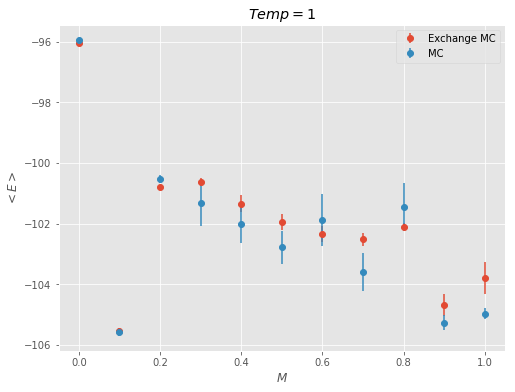

In [160]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, energy_m_T1, yerr=energy_s_T1, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, energy_m_T1_n, yerr=energy_s_T1_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=1$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
plt.legend()

fn = read_file_pass + 'Energy-M_figure_koukan-AriNashiHikaku_Temp=1_deltaT=51200-102400.png'
plt.savefig(fn)
plt.show()

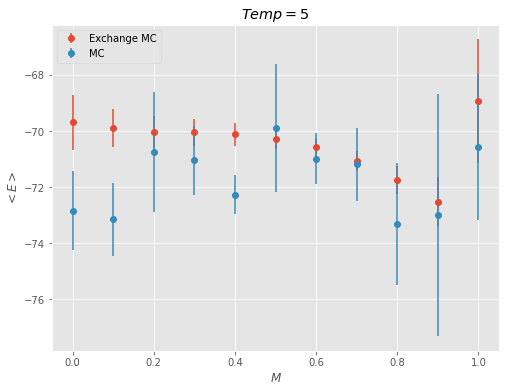

In [161]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, energy_m_T5, yerr=energy_s_T5, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, energy_m_T5_n, yerr=energy_s_T5_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=5$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
plt.legend(loc='upper left')

fn = read_file_pass + 'Energy-M_figure_koukan-AriNashiHikaku_Temp=5_deltaT=51200-102400.png'
plt.savefig(fn)
plt.show()

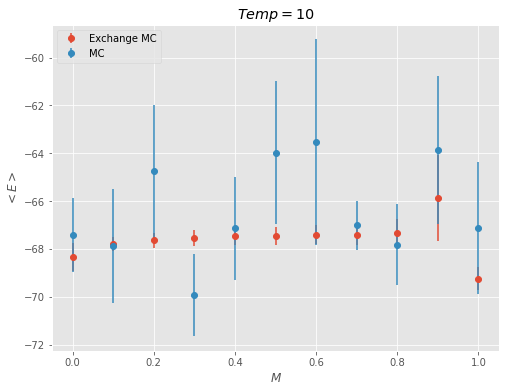

In [162]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, energy_m_T10, yerr=energy_s_T10, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, energy_m_T10_n, yerr=energy_s_T10_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=10$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
plt.legend(loc='upper left')

fn = read_file_pass + 'Energy-M_figure_koukan-AriNashiHikaku_Temp=10_deltaT=51200-102400.png'
plt.savefig(fn)
plt.show()

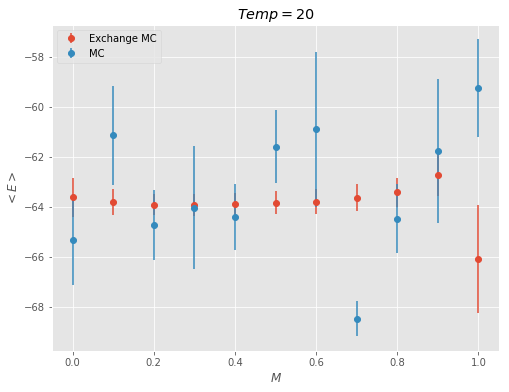

In [163]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, energy_m_T20, yerr=energy_s_T20, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, energy_m_T20_n, yerr=energy_s_T20_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=20$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')
plt.legend(loc='upper left')

fn = read_file_pass + 'Energy-M_figure_koukan-AriNashiHikaku_Temp=20_deltaT=51200-102400.png'
plt.savefig(fn)
plt.show()

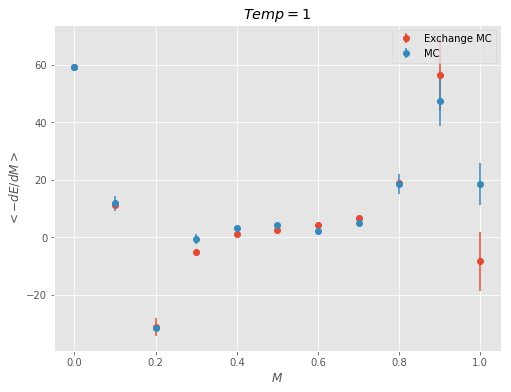

In [164]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, dlogp_m_T1, yerr=dlogp_s_T1, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, dlogp_m_T1_n, yerr=dlogp_s_T1_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=1$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

fn = read_file_pass + 'dEnergy-M_figure_koukan-AriNashiHikaku_Temp=1_deltaT=51200-102400.png'
plt.savefig(fn)
plt.show()

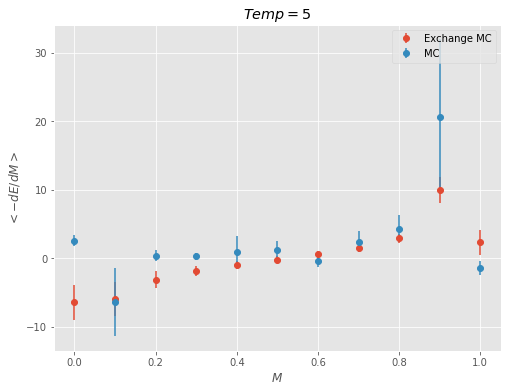

In [165]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, dlogp_m_T5, yerr=dlogp_s_T5, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, dlogp_m_T5_n, yerr=dlogp_s_T5_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=5$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

fn = read_file_pass + 'dEnergy-M_figure_koukan-AriNashiHikaku_Temp=5_deltaT=51200-102400.png'
plt.savefig(fn)
plt.show()

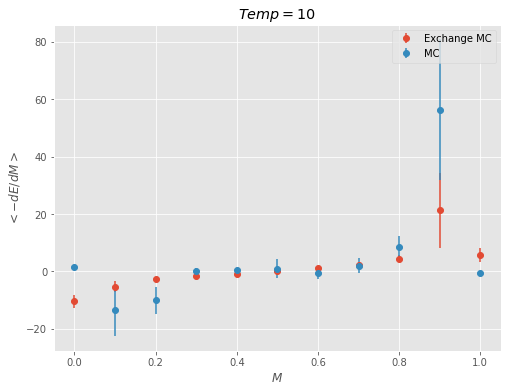

In [166]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, dlogp_m_T10, yerr=dlogp_s_T10, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, dlogp_m_T10_n, yerr=dlogp_s_T10_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=10$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

fn = read_file_pass + 'dEnergy-M_figure_koukan-AriNashiHikaku_Temp=10_deltaT=51200-102400.png'
plt.savefig(fn)
plt.show()

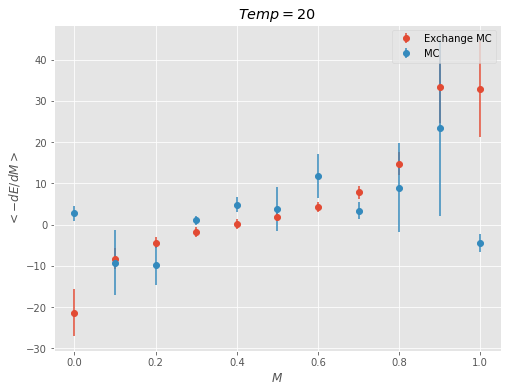

In [167]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
temp = np.array([1, 5, 10, 20])

ax.errorbar(model, dlogp_m_T20, yerr=dlogp_s_T20, color=cycle[0], fmt='o', label='Exchange MC')
ax.errorbar(model, dlogp_m_T20_n, yerr=dlogp_s_T20_n, color=cycle[1], fmt='o', label='MC')

ax.set_title('$Temp=20$')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

fn = read_file_pass + 'dEnergy-M_figure_koukan-AriNashiHikaku_Temp=20_deltaT=51200-102400.png'
plt.savefig(fn)
plt.show()

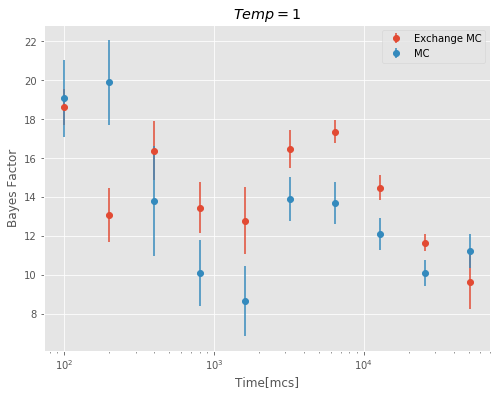

In [168]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T1[i][j, start:end].mean()
            
    N = 10
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/1
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Exchange MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T1_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/1.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])

        
    start = end
    end *= 2

ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
ax.set_title('$Temp=1$')
plt.legend()
#ax.set_ylim(-0.5, 1)
fn = read_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=1.png'
plt.savefig(fn)
plt.show()

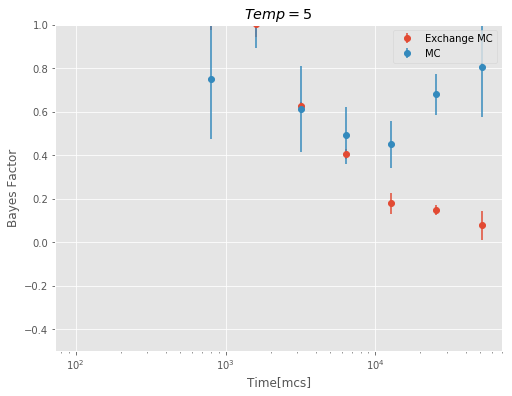

In [169]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T5[i][j, start:end].mean()
            
    N = 10
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/5
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Exchange MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T5_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/5.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])

        
    start = end
    end *= 2

ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
ax.set_title('$Temp=5$')
plt.legend()
ax.set_ylim(-0.5, 1)
fn = read_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=5.png'
plt.savefig(fn)
plt.show()

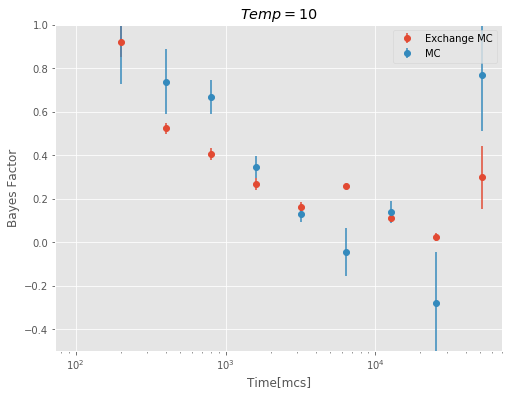

In [170]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T10[i][j, start:end].mean()
            
    N = 10
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/10
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Exchange MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T10_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/10.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])

        
    start = end
    end *= 2

ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
ax.set_title('$Temp=10$')
plt.legend()
ax.set_ylim(-0.5, 1)
fn = read_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=10.png'
plt.savefig(fn)
plt.show()

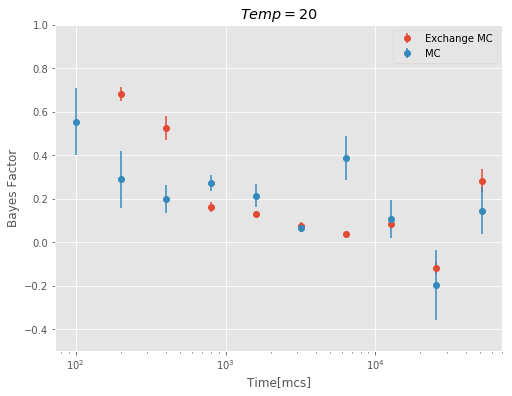

In [171]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T20[i][j, start:end].mean()
            
    N = 10
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/20.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Exchange MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
    
    dE = np.zeros([5, 11])
    for i in range(5):
        for j in range(11):
            dE[i, j] = dlogp_one_T20_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 5, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/20.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])

        
    start = end
    end *= 2

ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
ax.set_title('$Temp=20$')
plt.legend()
ax.set_ylim(-0.5, 1)
fn = read_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=20.png'
plt.savefig(fn)
plt.show()

In [74]:
exchange_one_T20

[array([ 42473.,  94543.,  97259.,  98175.,  98244.,  97896.,  96907.,
         94843.,  90808.,  30052.]),
 array([ 77121.,  90558.,  95419.,  96885.,  97213.,  97101.,  96413.,
         95093.,  90875.,  78140.]),
 array([ 91910.,  93226.,  96230.,  97432.,  97999.,  97992.,  97765.,
         96788.,  94158.,  75541.]),
 array([ 92569.,  94620.,  96276.,  96919.,  97023.,  96822.,  95822.,
         92852.,  86574.,  71205.]),
 array([ 48397.,  92909.,  95812.,  97075.,  97900.,  97880.,  96983.,
         94577.,  90241.,  71132.])]

In [75]:
exchange_one_T1

[array([   242.,    449.,   5884.,  14923.,  18077.,  20863.,  19990.,
         15103.,    736.,    235.]),
 array([   621.,    544.,   4675.,  13153.,  17127.,  18129.,  17428.,
         12983.,    746.,    142.]),
 array([   390.,    399.,   4531.,  16047.,  20424.,  21320.,  20461.,
         15008.,    697.,    113.]),
 array([   837.,    653.,   7455.,  14882.,  17948.,  18844.,  17849.,
         11741.,    198.,     88.]),
 array([   240.,    371.,   6149.,  12907.,  17494.,  18946.,  18763.,
         12810.,    327.,     40.])]

In [172]:
def fig_dE(start, dlogp, filename):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    
    read_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\'

    end = 2*start

    dlogp_m = np.zeros(11, dtype=float)
    dlogp_s = np.zeros(11, dtype=float)

    for i in range(11):
        bar_A_i = np.zeros(5, dtype=float)
        for j in range(5):
            bar_A_i[j] = dlogp[j][i][start:end].mean()
        dlogp_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(5):
            sig += (bar_A_i[j]-dlogp_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        dlogp_s[i] = sig


    ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color=cycle[0],
               label='{}-{}'.format(start, end))
    
    start = end
    end = 2*start
    
    dlogp_m = np.zeros(11, dtype=float)
    dlogp_s = np.zeros(11, dtype=float)

    for i in range(11):
        bar_A_i = np.zeros(5, dtype=float)
        for j in range(5):
            bar_A_i[j] = dlogp[j][i][start:end].mean()
        dlogp_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(5):
            sig += (bar_A_i[j]-dlogp_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        dlogp_s[i] = sig


    ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color=cycle[1],
               label='{}-{}'.format(start, end))
    
    start = end
    end = 2*start

    dlogp_m = np.zeros(11, dtype=float)
    dlogp_s = np.zeros(11, dtype=float)

    for i in range(11):
        bar_A_i = np.zeros(5, dtype=float)
        for j in range(5):
            bar_A_i[j] = dlogp[j][i][start:end].mean()
        dlogp_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(5):
            sig += (bar_A_i[j]-dlogp_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        dlogp_s[i] = sig


    ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color=cycle[2],
               label='{}-{}'.format(start, end))
    ax.set_xlabel('$M$')
    ax.set_ylabel('$<-dE/dM>$')

    plt.legend(loc='upper left')
    fn = read_file_pass + filename
    plt.savefig(fn)
    plt.show()
    
    return

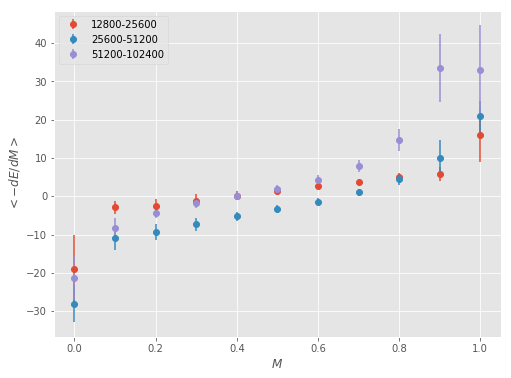

In [173]:
fig_dE(12800, dlogp_one_T20, 'dEnergy-M_figure_EveryDeltaTime_Temp=20.png')

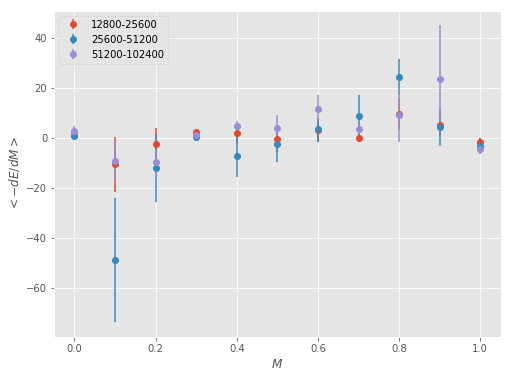

In [174]:
fig_dE(12800, dlogp_one_T20_n, 'dEnergy-M_figure_koukannashi_EveryDeltaTime_Temp=20.png')

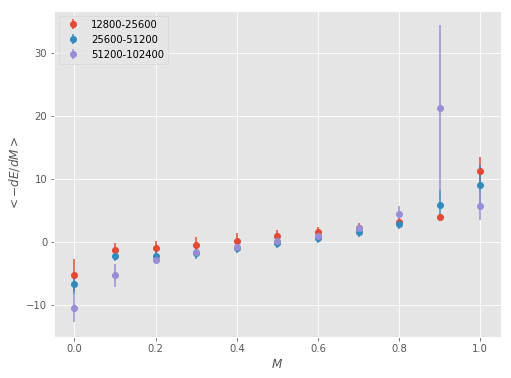

In [175]:
fig_dE(12800, dlogp_one_T10, 'dEnergy-M_figure_EveryDeltaTime_Temp=10.png')

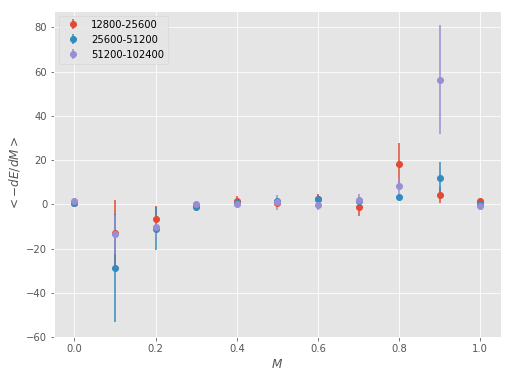

In [176]:
fig_dE(12800, dlogp_one_T10_n, 'dEnergy-M_figure_koukannashi_EveryDeltaTime_Temp=10.png')

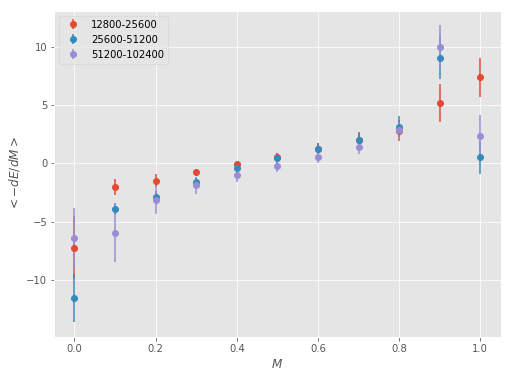

In [177]:
fig_dE(12800, dlogp_one_T5, 'dEnergy-M_figure_EveryDeltaTime_Temp=5.png')

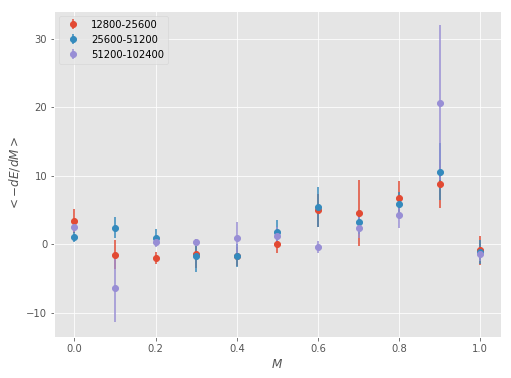

In [178]:
fig_dE(12800, dlogp_one_T5_n, 'dEnergy-M_figure_koukannashi_EveryDeltaTime_Temp=5.png')

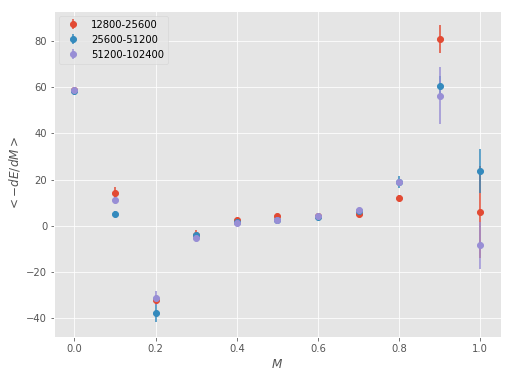

In [179]:
fig_dE(12800, dlogp_one_T1, 'dEnergy-M_figure_EveryDeltaTime_Temp=1.png')

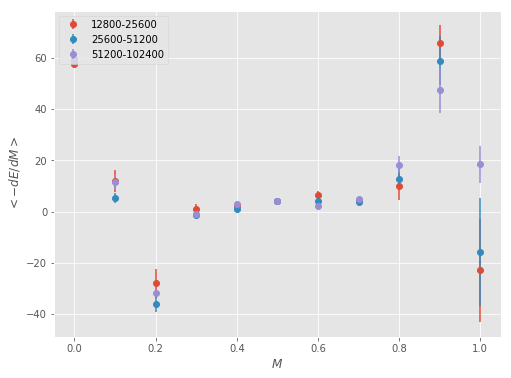

In [180]:
fig_dE(12800, dlogp_one_T1_n, 'dEnergy-M_figure_koukannashi_EveryDeltaTime_Temp=1.png')

## エネルギー収束

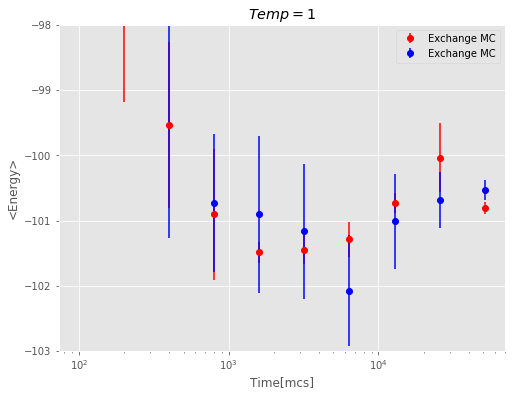

In [35]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

M_value = 2

while start<102400:
    
    Energy_one = np.zeros(5)
    for i in range(5):
        Energy_one[i] = energy_one_T1[i][M_value, start:end].mean()
        
#    print(start, end, Energy_one)
    bar_Energy_one = Energy_one.mean()
    
    sig_E_one = 0
    for i in range(5):
        sig_E_one += (Energy_one[i]-bar_Energy_one)**2
    sig_E_one /= (Energy_one.shape[0]-1)
    sig_E_one = np.sqrt(sig_E_one)
    sig_E_one /= np.sqrt(Energy_one.shape[0]-1)
    
    if start==100:
        ax.errorbar(start, bar_Energy_one, sig_E_one, fmt='o', color='red', label='Exchange MC')
    else:
        ax.errorbar(start, bar_Energy_one, sig_E_one, fmt='o', color='red')
        
        
    Energy_one = np.zeros(5)
    for i in range(5):
        Energy_one[i] = energy_one_T1_n[i][M_value, start:end].mean()
        
#    print(start, end, Energy_one)
    bar_Energy_one = Energy_one.mean()
    
    sig_E_one = 0
    for i in range(5):
        sig_E_one += (Energy_one[i]-bar_Energy_one)**2
    sig_E_one /= (Energy_one.shape[0]-1)
    sig_E_one = np.sqrt(sig_E_one)
    sig_E_one /= np.sqrt(Energy_one.shape[0]-1)
    
    if start==100:
        ax.errorbar(start, bar_Energy_one, sig_E_one, fmt='o', color='blue', label='Exchange MC')
    else:
        ax.errorbar(start, bar_Energy_one, sig_E_one, fmt='o', color='blue')
    
#     dE = np.zeros([5, 11])
#     for i in range(5):
#         for j in range(11):
#             dE[i, j] = dlogp_one_T1_n[i][j, start:end].mean()
            
#     y = np.zeros([N, 11])
#     S = np.zeros(N)
#     for i in range(N):
#         x = np.random.randint(0, 5, 11)
#         for j in range(11):
#             y[i, j] = dE[x[j], j]
#         S[i] = integrate.simps(y[i], model)/1.
        
#     bar_S = S.mean()
#     sig_S = 0.
#     for i in range(N):
#         sig_S += (S[i]-bar_S)**2
#     sig_S /= (S.shape[0]-1)
#     sig_S = np.sqrt(sig_S)
#     sig_S /= np.sqrt(S.shape[0])
    
#     if start==100:
#         ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='MC')
#     else:
#         ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])

        
    start = end
    end *= 2

ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('<Energy>')
ax.set_title('$Temp=1$')
plt.legend()
ax.set_ylim(-103, -98)
#fn = read_file_pass + 'BayesFactor-Time_figure_koukan-AriNashiHikaku_Temp=1.png'
#plt.savefig(fn)
plt.show()

## Temp=5, 10, 20に関してサンプル数を10に増やす

In [85]:
de0_one_T5_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
de1_one_T5_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
ka_one_T5_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
kd_one_T5_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
sigma_one_T5_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
energy_one_T5_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
dlogp_one_T5_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
pick_one_T5_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
update_one_T5_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
exchange_one_T5_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

de0_one_T5 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
de1_one_T5 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
ka_one_T5 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
kd_one_T5 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
sigma_one_T5 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
energy_one_T5 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
dlogp_one_T5 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
pick_one_T5 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
update_one_T5 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
exchange_one_T5 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

de0_one_T10_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
de1_one_T10_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
ka_one_T10_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
kd_one_T10_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
sigma_one_T10_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
energy_one_T10_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
dlogp_one_T10_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
pick_one_T10_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
update_one_T10_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
exchange_one_T10_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

de0_one_T10 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
de1_one_T10 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
ka_one_T10 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
kd_one_T10 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
sigma_one_T10 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
energy_one_T10 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
dlogp_one_T10 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
pick_one_T10 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
update_one_T10 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
exchange_one_T10 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

de0_one_T20_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
de1_one_T20_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
ka_one_T20_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
kd_one_T20_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
sigma_one_T20_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
energy_one_T20_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
dlogp_one_T20_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
pick_one_T20_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
update_one_T20_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
exchange_one_T20_n = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

de0_one_T20 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
de1_one_T20 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
ka_one_T20 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
kd_one_T20 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
sigma_one_T20 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
energy_one_T20 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
dlogp_one_T20 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
pick_one_T20 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
update_one_T20 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
exchange_one_T20 = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [86]:
%%time

read_file_pass = '\\Users\\anbaigashi\\Desktop\\ABC\\2019\\March\\'

time = 102400
time_n = 204800
for i in range(10):
    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=20.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T20_n[i], de1_one_T20_n[i], ka_one_T20_n[i], kd_one_T20_n[i], sigma_one_T20_n[i], energy_one_T20_n[i], dlogp_one_T20_n[i],\
    pick_one_T20_n[i], update_one_T20_n[i], exchange_one_T20_n[i] = file_output_one(r_file, time_n, model)    
    
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=20.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T20[i], de1_one_T20[i], ka_one_T20[i], kd_one_T20[i], sigma_one_T20[i], energy_one_T20[i], dlogp_one_T20[i],\
    pick_one_T20[i], update_one_T20[i], exchange_one_T20[i] = file_output_one(r_file, time, model)

Wall time: 5min 51s


In [87]:
%%time

for i in range(10):
    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=10.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T10_n[i], de1_one_T10_n[i], ka_one_T10_n[i], kd_one_T10_n[i], sigma_one_T10_n[i], energy_one_T10_n[i], dlogp_one_T10_n[i],\
    pick_one_T10_n[i], update_one_T10_n[i], exchange_one_T10_n[i] = file_output_one(r_file, time_n, model)    
    
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=10.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T10[i], de1_one_T10[i], ka_one_T10[i], kd_one_T10[i], sigma_one_T10[i], energy_one_T10[i], dlogp_one_T10[i],\
    pick_one_T10[i], update_one_T10[i], exchange_one_T10[i] = file_output_one(r_file, time, model)

Wall time: 9min 56s


In [88]:
%%time

for i in range(10):
    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=5.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T5_n[i], de1_one_T5_n[i], ka_one_T5_n[i], kd_one_T5_n[i], sigma_one_T5_n[i], energy_one_T5_n[i], dlogp_one_T5_n[i],\
    pick_one_T5_n[i], update_one_T5_n[i], exchange_one_T5_n[i] = file_output_one(r_file, time_n, model)    
    
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=102400mcs_Temp=5.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T5[i], de1_one_T5[i], ka_one_T5[i], kd_one_T5[i], sigma_one_T5[i], energy_one_T5[i], dlogp_one_T5[i],\
    pick_one_T5[i], update_one_T5[i], exchange_one_T5[i] = file_output_one(r_file, time, model)

Wall time: 8min 14s


In [181]:
def fig_energy(start, energy, filename):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    
    read_file_pass = '\\Users\\anbaigashi\\Desktop\\学会.発表\\2019年日本物理学会春季大会\\スライド\\figure\\'

    end = 2*start

    energy_m = np.zeros(11, dtype=float)
    energy_s = np.zeros(11, dtype=float)

    for i in range(11):
        bar_A_i = np.zeros(10, dtype=float)
        for j in range(10):
            bar_A_i[j] = energy[j][i][start:end].mean()
        energy_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(10):
            sig += (bar_A_i[j]-energy_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        energy_s[i] = sig


    ax.errorbar(0.1*np.arange(11, dtype=float), energy_m, yerr=energy_s, fmt='o', color='red')
    ax.set_xlabel('$M$')
    ax.set_ylabel('$<Eenrgy>$')

    fn = read_file_pass + filename
    plt.savefig(fn)

    plt.show()
    
    return energy_m, energy_s

In [182]:
def fig_dE(start, dlogp, filename):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    end = 2*start

    dlogp_m = np.zeros(11, dtype=float)
    dlogp_s = np.zeros(11, dtype=float)

    for i in range(11):
        bar_A_i = np.zeros(10, dtype=float)
        for j in range(10):
            bar_A_i[j] = dlogp[j][i][start:end].mean()
        dlogp_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(10):
            sig += (bar_A_i[j]-dlogp_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        dlogp_s[i] = sig


    ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color='red')
    ax.set_xlabel('$M$')
    ax.set_ylabel('$<-dE/dM>$')

    fn = read_file_pass + filename
    plt.savefig(fn)

    plt.show()
    
    return dlogp_m, dlogp_s

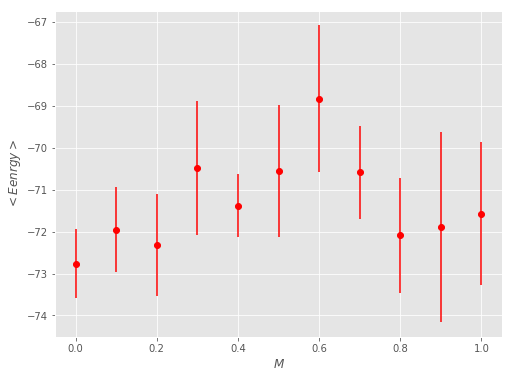

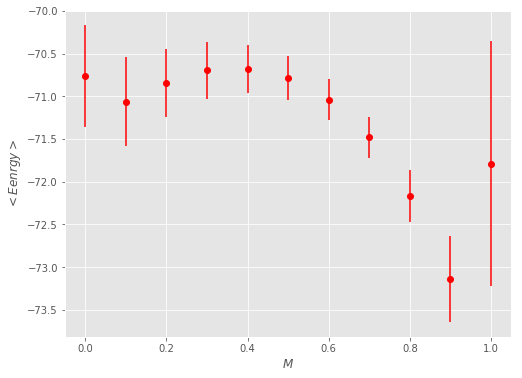

In [184]:
energy_m_T5_n, energy_s_T5_n = fig_energy(51200, energy_one_T5_n, 'Energy-M_figure_koukannashi_Sample=10ko_Temp=5_deltaT=51200-102400.png')
energy_m_T5, energy_s_T5 = fig_energy(51200, energy_one_T5, 'Energy-M_figure_Sample=10ko_Temp=5_deltaT=51200-102400.png')

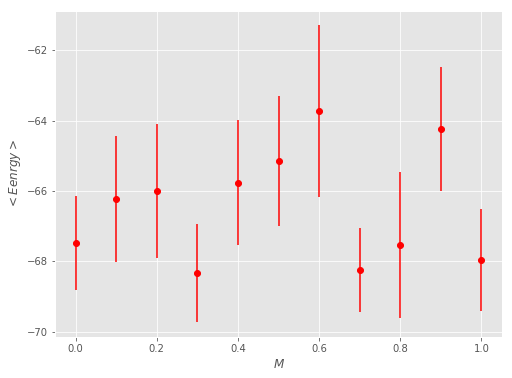

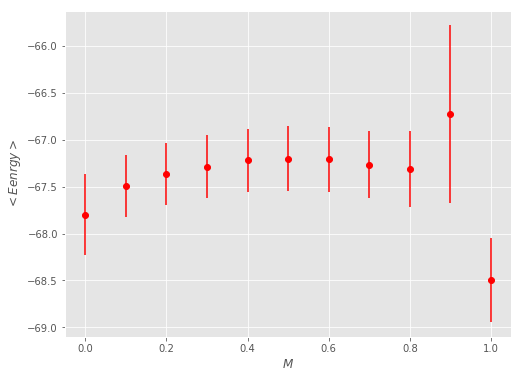

In [185]:
energy_m_T10_n, energy_s_T10_n = fig_energy(51200, energy_one_T10_n, 'Energy-M_figure_koukannashi_Sample=10ko_Temp=10_deltaT=51200-102400.png')
energy_m_T10, energy_s_T10 = fig_energy(51200, energy_one_T10, 'Energy-M_figure_Sample=10ko_Temp=10_deltaT=51200-102400.png')

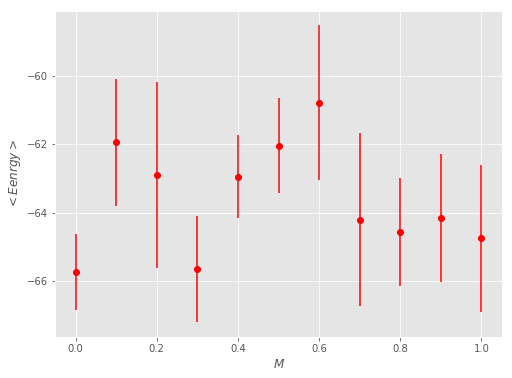

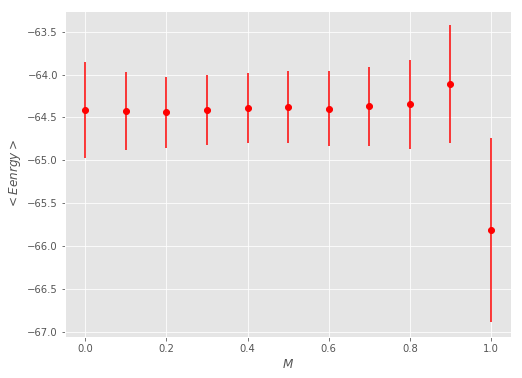

In [186]:
energy_m_T20_n, energy_s_T20_n = fig_energy(51200, energy_one_T20_n, 'Energy-M_figure_koukannashi_Sample=10ko_Temp=20_deltaT=51200-102400.png')
energy_m_T20, energy_s_T20 = fig_energy(51200, energy_one_T20, 'Energy-M_figure_Sample=10ko_Temp=20_deltaT=51200-102400.png')

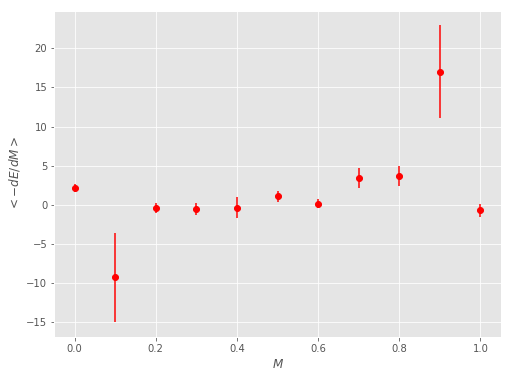

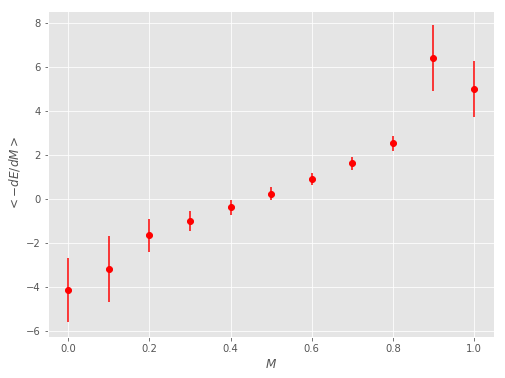

In [187]:
dlogp_m_T5_n, dlogp_s_T5_n = fig_dE(51200, dlogp_one_T5_n, 'dEnergy-M_figure_koukannashi_Sample=10ko_Temp=5_deltaT=51200-102400.png')
dlogp_m_T5, dlogp_s_T5 = fig_dE(51200, dlogp_one_T5, 'dEnergy-M_figure_Sample=10ko_Temp=5_deltaT=51200-102400.png')

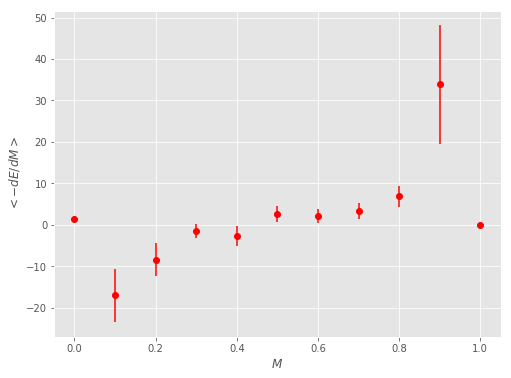

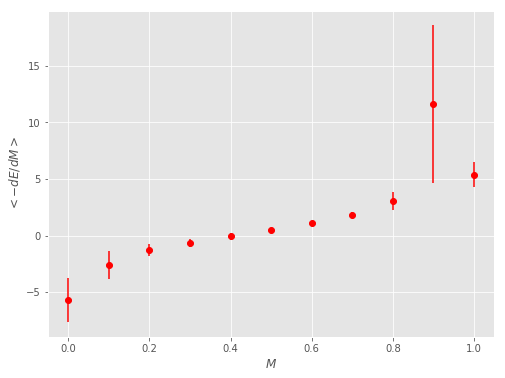

In [188]:
dlogp_m_T10_n, dlogp_s_T10_n = fig_dE(51200, dlogp_one_T10_n, 'dEnergy-M_figure_koukannashi_Sample=10ko_Temp=10_deltaT=51200-102400.png')
dlogp_m_T10, dlogp_s_T10 = fig_dE(51200, dlogp_one_T10, 'dEnergy-M_figure_Sample=10ko_Temp=10_deltaT=51200-102400.png')

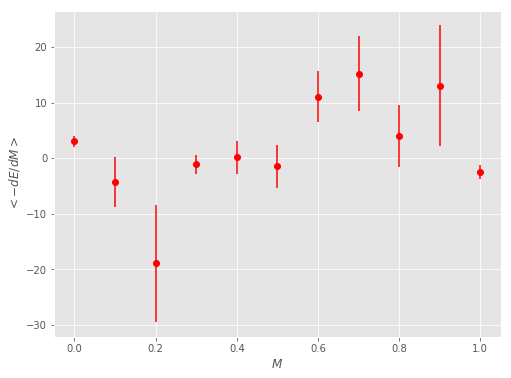

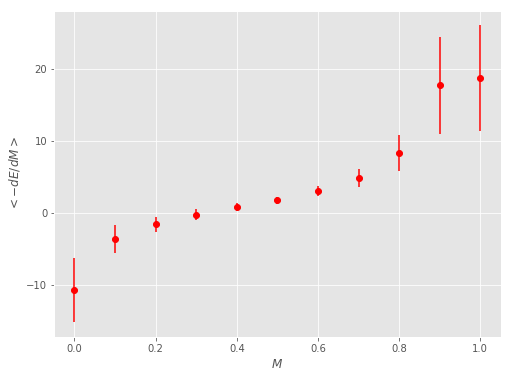

In [189]:
dlogp_m_T20_n, dlogp_s_T20_n = fig_dE(51200, dlogp_one_T20_n, 'dEnergy-M_figure_koukannashi_Sample=10ko_Temp=20_deltaT=51200-102400.png')
dlogp_m_T20, dlogp_s_T20 = fig_dE(51200, dlogp_one_T20, 'dEnergy-M_figure_Sample=10ko_Temp=20_deltaT=51200-102400.png')

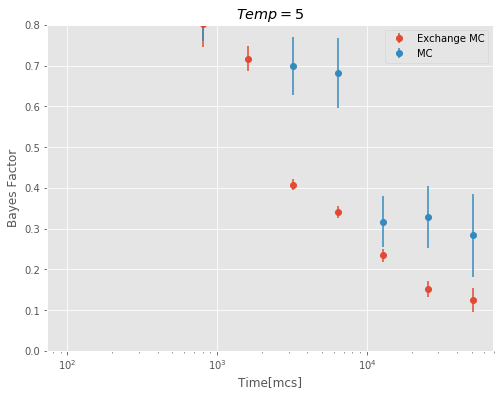

In [190]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([10, 11])
    for i in range(10):
        for j in range(11):
            dE[i, j] = dlogp_one_T5[i][j, start:end].mean()
            
    N = 40
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 10, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/5.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Exchange MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
    
    dE = np.zeros([10, 11])
    for i in range(10):
        for j in range(11):
            dE[i, j] = dlogp_one_T5_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 10, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/5.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])

        
    start = end
    end *= 2

ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
ax.set_title('$Temp=5$')
plt.legend()
ax.set_ylim(0.0, 0.8)
fn = read_file_pass + 'BayesFactor-Time_figure_Sample=10ko_koukan-AriNashiHikaku_Temp=5.png'
plt.savefig(fn)
plt.show()

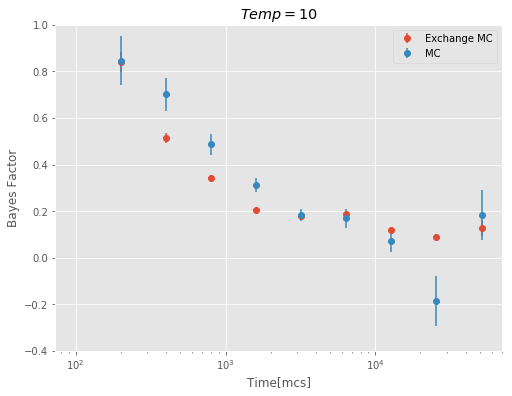

In [191]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([10, 11])
    for i in range(10):
        for j in range(11):
            dE[i, j] = dlogp_one_T10[i][j, start:end].mean()
            
    N = 40
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 10, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/10.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Exchange MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
    
    dE = np.zeros([10, 11])
    for i in range(10):
        for j in range(11):
            dE[i, j] = dlogp_one_T10_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 10, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/10.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])

        
    start = end
    end *= 2

ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
ax.set_title('$Temp=10$')
plt.legend()
ax.set_ylim(-0.4, 1)
fn = read_file_pass + 'BayesFactor-Time_figure_Sample=10ko_koukan-AriNashiHikaku_Temp=10.png'
plt.savefig(fn)
plt.show()

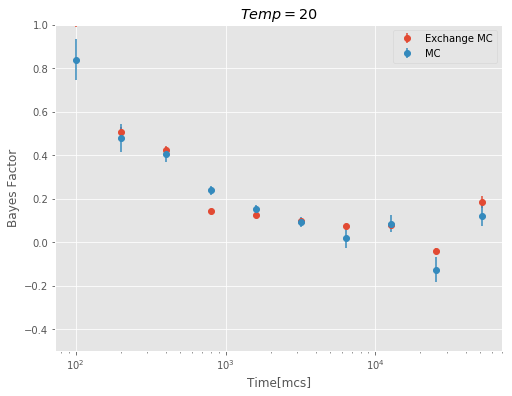

In [192]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

t_0 = 100
start = t_0
end = 2*start

while start<102400:
    
    dE = np.zeros([10, 11])
    for i in range(10):
        for j in range(11):
            dE[i, j] = dlogp_one_T20[i][j, start:end].mean()
            
    N = 40
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 10, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/20.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0], label='Exchange MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[0])
    
    dE = np.zeros([10, 11])
    for i in range(10):
        for j in range(11):
            dE[i, j] = dlogp_one_T20_n[i][j, start:end].mean()
            
    y = np.zeros([N, 11])
    S = np.zeros(N)
    for i in range(N):
        x = np.random.randint(0, 10, 11)
        for j in range(11):
            y[i, j] = dE[x[j], j]
        S[i] = integrate.simps(y[i], model)/20.
        
    bar_S = S.mean()
    sig_S = 0.
    for i in range(N):
        sig_S += (S[i]-bar_S)**2
    sig_S /= (S.shape[0]-1)
    sig_S = np.sqrt(sig_S)
    sig_S /= np.sqrt(S.shape[0])
    
    if start==100:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1], label='MC')
    else:
        ax.errorbar(start, bar_S, sig_S, fmt='o', color=cycle[1])

        
    start = end
    end *= 2

ax.set_xscale('log')
ax.set_xlabel('Time[mcs]')
ax.set_ylabel('Bayes Factor')
ax.set_title('$Temp=20$')
plt.legend()
ax.set_ylim(-0.5, 1)
fn = read_file_pass + 'BayesFactor-Time_figure_Sample=10ko_koukan-AriNashiHikaku_Temp=20.png'
plt.savefig(fn)
plt.show()

In [121]:
print(energy_one_T20[4][10])
print(energy_one_T20[9][10])

[ 19137.13589473  20256.91890088  19098.69059675 ...,    -71.0931731
    -70.96885205    -70.96885205]
[ 19137.13589473  15757.36290953  19503.20609214 ...,    -78.70604209
    -75.47630746    -60.07933025]
